**1. Problema da condução de calor - 1D**

**1.1. Formulação forte**

Seja o **problema unidimensional** ($\Omega = (0,1) \subset \mathbb{R}$), **não homogêneo** ($f(x) \neq 0$) e sob **regime permanente (ou estacionário)** com **condições de contorno de Dirichlet nulas** de determinar $u(x) \in H_0^1(0,1)$ tal que:
$$
\left \{
\begin{equation*}
\begin{split}
&- \alpha ~u_{xx} + \beta ~u(x) = f(x), ~ \forall x \in (0,1) \\
&u(0) = u(1) = 0,
\end{split}
\end{equation*}
\right.
$$

com $\alpha > 0$, $\beta \geq 0$ e $f(x) \in L^2(0,1)$ **regular (suficientemente suave)**.

Vamos simular um exemplo numérico com as constantes

$\alpha = \beta = 1$

e solução analítica

$u(x) = \sin(\pi x)$,

de onde obtemos

$f(x) = (1 - \pi^2) \sin(\pi x)$

Vamos definir também as seguintes constantes:

$nelx$: número de elementos (subintervalos no caso 1D) na reta $x$

Aqui, $nelx = 2^{\text{expoente}}$.

Usando **expoente = $2$**, temos $nelx = $2^{2} = 4$.

$m$: número de nós globais na reta $x$

No caso 1D, $m = nelx + 1$.

Aqui, $nelx = 4 \Rightarrow m = 4 + 1 = 5$. 

O domínio $\Omega$ que usamos neste exemplo é $[x_1, x_m] = [0,1]$.

Ou seja, $x_1 = 0$ e $x_m = 1$.

<center>
<img src="Figura001.png"/>
</center>

O tamanho da malha é dado pelo tamanho de cada elemento, ou seja, de cada subintervalo $h = \Delta x$ na reta.

Aqui, $h = \Delta x = \dfrac{x_m - x_1}{nelx} = \dfrac{x_m - x_1}{m-1} = \dfrac{1 - 0}{4} = \dfrac{1}{4}$.



In [19]:
# Importar a biblioteca numpy para solução de sistemas lineares:
import numpy as np

# Importar a biblioteca matplotlib.pyplot para exibição dos gráficos:
import matplotlib.pyplot as plt

# Importar a biblioteca math para definição das constantes matemáticas (Pi, por exemplo):
import math

# expoente usado para o numero de elementos na base 2.
expoente = 2

# nel: numero de elementos na base 2 
# A função pow(2,potencia) calcula 2 ^ potencia
# se potencia = 2, então pow(2,2) retorna 2 ^ 2
nelx = pow(2,expoente)

# numero de nós globais no caso 1D:
# é o número de elementos mais 1: 
m = nelx + 1

# defino a constante alpha:
alpha = 1

# defino a constante beta:
beta = 1

# defino o nó inicial x_0:
x_1 = 0

# defino o nó final x_m:
x_m = 1

# defino o tamanho da malha:
# ou seja, o tamanho de cada intervalo na reta x:
h = (x_m - x_1) / (m - 1)

# defino a constante π ≈ 3,14159265358979323846
Pi = float(math.pi)


**1.2. Formulação fraca**

Os passos para obter a formulação fraca do problema são:

**1. Verificar as condições de contorno:** No exemplo, são de **Dirichlet** e **nulas**. Assim, podemos multiplicar a equação do problema por uma **função teste** ${\color{blue} v(x) } \in V$ que se anula nos seus contornos. Neste exemplo, $V = H_0^1(0,1)$. 

**2. Multiplicar a equação por** $v(x) \in V$:
$$
\begin{equation*}
- \alpha ~u_{xx} ~{\color{blue} v(x) } + \beta ~ u(x) ~ {\color{blue} v(x) } = f(x) ~ {\color{blue} v(x) }
\end{equation*}
$$

**3. Integrar no domínio** $\Omega = (0,1)$ para obter:

$$
\begin{equation*}
- \alpha \int_0^1 ~u_{xx} ~{\color{blue} v(x) } ~dx + \beta \int_0^1  ~ u(x) ~ {\color{blue} v(x) } ~dx = \int_0^1  f(x) ~ {\color{blue} v(x) } ~dx, ~\forall ~v \in V
\end{equation*}
$$

Usando integração por partes na primeira integral do lado esquerdo, obtemos:

$$
\begin{equation*}
\alpha \int_0^1 ~u_x ~{\color{blue} v_x } ~dx + \beta \int_0^1  ~ u(x) ~ {\color{blue} v(x) } ~dx = \int_0^1  f(x) ~ {\color{blue} v(x) } ~dx, ~\forall ~v \in V
\end{equation*}
$$

Em notação de produto interno, a formulação fraca acima fica:

$$
\begin{equation*}
\alpha (u_x,{\color{blue} v_x}) + \beta (u, ~ {\color{blue} v }) = (f, ~ {\color{blue} v }), ~\forall ~v \in V
\end{equation*}
$$

**1.3. Formulação de Galerkin (Problema aproximado)**

Partindo da formulação fraca, através da **formulação de Galerkin**, devemos obter o **problema aproximado**, usando uma **base de dimensão finita** $V_h \subset V$, tal que

$$
\begin{equation*}
V_h = [\varphi_1, \varphi_2, \ldots, \varphi_m],
\end{equation*}
$$

onde, neste exemplo, cada $\varphi_i$, $i = 1,2,\ldots,m$, é uma função da base de **Lagrange linear**, tal que:

$$
\begin{equation}
\begin{split}
\varphi_i(x_j) = 
 \left\{
\begin{array}{ll}
      1, & \text{ se } i = j, \\[2pt]
      0, & \text{ se } i \neq j,
\end{array} 
\right.
\end{split}
\end{equation}
$$

<center>
<img src="Figura002.png"/>
</center>

Assim, se a solução aproximada $u_h \in V_h$, ela pode ser escrita como:

$$
\begin{equation*}
u_h(x) = \sum_{i=1}^m c_i ~\varphi_i(x)
\end{equation*}
$$

Como $V_h \subset V$, então:

$$
\begin{equation}
\alpha (u_x, {\color{blue} (v_h)_x } ) + \beta (u, {\color{blue} v_h }) = (f, {\color{blue} v_h }) ~, ~ \forall ~ {\color{blue} v_h } \in V_h
\end{equation}
$$

Substituindo $u(x)$ por $u_h(x)$, obtemos:

$$
\begin{equation*}
\alpha ((u_h)_x, {\color{blue} (v_h)_x } ) + \beta (u_h, {\color{blue} v_h }) = (f, {\color{blue} v_h }) ~, ~ \forall ~ {\color{blue} v_h } \in V_h
\end{equation*}
$$

Substituindo $u_h$ na equação acima, obtemos usando linearidade, transposta dos termos e simetria (verifique!):

$$
\begin{equation*}
\alpha \sum_{j=1}^m (\varphi_{ix}, {\color{blue} \varphi_{jx} } ) c_j + \beta \sum_{j=1}^m (\varphi_i, {\color{blue} \varphi_j } ) c_j = (f, {\color{blue} \varphi_i }), ~ \text{ para } i = 1, 2, \ldots, m
\end{equation*}
$$


Vou denotar os produtos internos da equação pelas matrizes $M$, $N$ e pelo vetor $F$, cujos elementos são respectivamente: 

$$
\begin{equation*}
M_{ij} = (\varphi_{ix}, {\color{blue} \varphi_{jx} } ); \quad N_{ij} = (\varphi_i, {\color{blue} \varphi_j } );
\quad F_i = (f, {\color{blue} \varphi_i })
\end{equation*}
$$

Logo,

$$
\begin{equation*}
\begin{split}
\alpha \sum_{j=1}^m M_{ij} ~c_j + \beta \sum_{j=1}^m N_{ij} ~c_j = F_i, ~ \text{ para } i = 1, 2, \ldots, m \\
\Rightarrow \sum_{j=1}^m ( \alpha M_{ij} + \beta N_{ij} ) ~c_j = F_i, ~ \text{ para } i = 1, 2, \ldots, m
\end{split}
\end{equation*}
$$

Denotando os elementos da **matriz de rigidez** ou **matriz de condutividade térmica**  por $K_{ij} = \alpha M_{ij} + \beta N_{ij}$ e os elementos do **vetor força global** por $F_i$, obtemos:

$$
\begin{equation*}
\begin{split}
\sum_{j=1}^m K_{ij} ~c_j = F_i, ~ \text{ para } i = 1, 2, \ldots, m
\end{split}
\end{equation*}
$$

Na notação matricial,

$$
\begin{equation*}
\begin{split}
K c = F,
\end{split}
\end{equation*}
$$

onde

$$
  K =
  \left[ {\begin{array}{cccc}
    K_{11} & K_{12} & \cdots & K_{1m}\\
    K_{21} & K_{22} & \cdots & K_{2m}\\
    \vdots & \vdots & \ddots & \vdots\\
    K_{m1} & K_{m2} & \cdots & K_{mm}\\
  \end{array} } \right],
\quad
c =
   \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_m \end{bmatrix},
\quad
F =
   \begin{bmatrix} F_1 \\ F_2 \\ \vdots \\ F_m \end{bmatrix}.
$$

Note que para cada nó $x_j$, $j = 1,2,\ldots,m$, do domínio discretizado $[x_1,x_m]$, temos:

$$
\begin{equation*}
\begin{split}
u_h(x_j) &= \sum_{i=1}^m c_i ~\varphi_i(x_j) = c_1 ~\cancel{\varphi_1(x_j)} + c_2 ~\cancel{\varphi_2(x_j)} + \ldots + c_{j-1} ~\cancel{\varphi_{j-1}(x_j)} + c_j ~\underbrace{\varphi_j(x_j)}_{=1} + c_{j+1} ~\cancel{\varphi_{j+1}(x_j)} + \ldots c_m ~\cancel{\varphi_m(x_j)} \\
&\Rightarrow u_h(x_j) = c_j, ~ j = 1,2,\ldots,m
\end{split}
\end{equation*}
$$

Ou seja, $c_j$ é a solução aproximada $u_h(x_j)$ para cada nó $x_j$, $j = 1,2,\ldots,m$ do problema aproximado.

**Problema aproximado**
$$
\begin{equation*}
Kc = F,
\end{equation*}
$$

com
\begin{equation*}
K = [K_{ij}]_{m \times m}, \quad c = [c_i]_{m \times 1}, \quad F = [F_i]_{m \times 1},
\end{equation*}

onde
\begin{equation*}
K_{ij} = a(\varphi_i, \varphi_j) = \alpha M_{ij} + \beta N_{ij}, \quad
M_{ij} = (\varphi_{ix}, \varphi_{jx}), \quad
N_{ij} = (\varphi_i, \varphi_j), \quad
F_i = (f,\varphi_i). 
\end{equation*}

$$


In [24]:
# Cria uma matriz K zerada com m linhas e m colunas:
K = np.zeros((m, m))

# Cria um vetor F zerado com m linhas e 1 coluna:
F = np.zeros((m, 1))

# Cria um vetor u zerado com m linhas e 1 coluna:
u = np.zeros((m, 1))

# ErrAbs: erro absoluto abs(u - u_h),
# onde u é a solução analítica e u_h é a solução  aproximada do método numérico
# Cria um vetor ErrAbs zerado com m linhas e 1 coluna:
ErrAbs = np.zeros((m, 1))


# range(start, stop, step)
# start	Optional. An integer number specifying at which position to start. Default is 0
# stop	Required. An integer number specifying at which position to stop (not included).
# step	Optional. An integer number specifying the incrementation. Default is 1

# range(0, m, x_m): intervalo [0,m] com passo x_m
# Exemplo: x in range(0, 5, 1): x está no intervalo [0,5) com passo 1: 
# Ou seja, x  está no conjunto {0, 1, 2, 3, 4} (O elemento final 5 não está incluído)
# Para cada elemento do conjunto:
# float(x) / (m-1) = float(0) / (m-1)
# Então, cada elemento do vetor x é dado por:
# float(0) / (5-1) = float(0) / 4 = 0.0
# float(1) / (5-1) = float(1) / 4 = 0.25
# float(2) / (5-1) = float(2) / 4 = 0.5
# float(3) / (5-1) = float(3) / 4 = 0.75
# float(4) / (5-1) = float(4) / 4 = 1.0
x = [float(x) / (m-1) for x in range(0, m, x_m)]

# Exibe no terminal o vetor de nós globais:
print('Nós globais:\n')
print('x = ', x)

# Linha em branco:
print('\n')

# Exibe a matriz global K recém-criada e zerada:
print('Matriz global K recém-criada e zerada:\n')
print(K)

print('\n')

# Exibe o tamanho da matriz global K:
print('Tamanho da matriz global K:\n')
print(K.shape)

# Pega o numero de linhas e colunas de K:
dimensions = K.shape
rows, columns = dimensions

# Exibe o numero de linhas e colunas de K:
print('Linhas:', rows)
print('Colunas:', columns)

print('\n')

Nós globais:

x =  [0.0, 0.25, 0.5, 0.75, 1.0]


Matriz global K recém-criada e zerada:

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Tamanho da matriz global K:

(5, 5)
Linhas: 5
Colunas: 5




**1.3.1. Interpolação de Lagrange linear por partes**

Os **nós** $x_j$, para $j = 1, 2, \ldots, m$, são **pontos discretos** do intervalo $\Omega = [x_1, x_m]$ distribuídos de forma equidistante.

Portanto, dividimos o domínio $\Omega$ em $(m-1)$ partes iguais e definimos o passo
$$
\begin{equation*}
h = x_{i+1} - x_i, \text{ para } \quad i = 1, \ldots, m.
\end{equation*}
$$

**Obs.:** Os nós $x_0$ e $x_{m+1}$ estão fora do domínio $\Omega$.

<center>
<img src="Figura003.png"/>
</center>

Em cada nó $x_i$, definimos a função de Lagrange linear por partes $\varphi_i(x)$, satisfazendo a condição

$$
\begin{equation*}
\begin{split}
\varphi_i(x_j) = 
 \left\{
\begin{array}{ll}
      1, & \text{ se } i = j, \\[2pt]
      0, & \text{ se } i \neq j.
\end{array} 
\right.
\end{split}
\end{equation*}
$$

Assim, $\varphi_i(x)$ para $i = 1, \ldots, m$ é definida por:

$$
\begin{equation*}
\begin{split}
\varphi_i(x) = 
 \left\{
\begin{array}{ll}
      \dfrac{x - x_{i-1}}{x_i - x_{i-1}} =  \dfrac{x - x_{i-1}}{h}, & \text{ se } x \in [x_{i-1}, x_i], \\[12pt]
      \dfrac{x_{i+1} - x}{x_{i+1} - x_i} = \dfrac{x_{i+1} - x}{h}, & \text{ se } x \in [x_i, x_{i+1}], \\[12pt]
      0, & \text{ se } x \not\in [x_{i-1}, x_{i+1}].
\end{array} 
\right.
\end{split}
\end{equation*}
$$

Para a derivada de $\varphi_i(x)$, temos:

$$
\begin{equation*}
\begin{split}
\varphi_{ix}(x) = \dfrac{d \varphi_i}{d x} =
 \left\{
\begin{array}{ll}
      \dfrac{1}{h}, & \text{ se } x \in [x_{i-1}, x_i], \\[6pt]
      -\dfrac{1}{h}, & \text{ se } x \in [x_i, x_{i+1}], \\[6pt]
      0, & \text{ se } x \not\in [x_{i-1}, x_{i+1}].
\end{array} 
\right.
\end{split}
\end{equation*}
$$

<center>
<img src="Figura004.png"/>
</center>

Observe que para $\varphi_i$ e $\varphi_j$ não consecutivos:

$$
\begin{equation*}
\varphi_i(x) \varphi_j(x) = \dfrac{d \varphi_i}{d x} \dfrac{d \varphi_j}{d x} = 0, \quad \text{ se } \vert i - j \vert \geq 2.
\end{equation*}
$$

<center>
<img src="Figura005.png"/>
</center>

Pela definição do elemento $K_{ij}$ da **matriz global** $K$ do problema aproximado,

$$
\begin{equation*}
K_{ij} = \alpha M_{ij} + \beta N_{ij} = \alpha (\varphi_{ix}, \varphi_{jx})  + \beta (\varphi_i, \varphi_j) = \alpha \int_0^1 \varphi_{ix} \varphi_{jx} dx + \beta \int_0^1 \varphi_i \varphi_j dx
\end{equation*}
$$

Usando essa definição, temos:

- **Elemento** $K_{11}$:

$$
\begin{equation*}
\begin{split}
K_{11} & = \alpha(\varphi_{1x},\varphi_{1x}) + \beta (\varphi_1,\varphi_1) 
= \alpha \int_0^1 (\varphi_{1x})^2 dx + \beta \int_0^1 (\varphi_1(x))^2 dx \\
& = \alpha {\color{red} \int_{x_1}^{x_2} \Big( - \dfrac{1}{h} \Big)^2 dx }
+ \beta {\color{red} \int_{x_1}^{x_2} \Big( \dfrac{x_2 - x}{h} \Big)^2 dx }  = \dfrac{\alpha}{h} + \dfrac{\beta h}{3}.
\end{split}
\end{equation*}
$$

**Obs.:** $x_0$ é um nó que não faz parte do domínio $\Omega = [x_1, x_m] = [0,1]$.

<center>
<img src="Figura006.png"/>
</center>

- **Elemento** $K_{mm}$:

$$
\begin{equation*}
\begin{split}
& K_{mm} = \alpha(\varphi_{mx},\varphi_{mx}) + \beta (\varphi_m,\varphi_m) 
= \alpha \int_0^1 (\varphi_{mx})^2 dx + \beta \int_0^1 (\varphi_m(x))^2 dx \\
& = \alpha {\color{blue} \int_{x_{m-1}}^{x_m} \Big( \dfrac{1}{h} \Big)^2 dx }
+ \beta {\color{blue} \int_{x_{m-1}}^{x_m} \Big( \dfrac{x - x_{m-1}}{h} \Big)^2 dx } = \dfrac{\alpha}{h} + \dfrac{\beta h}{3}. 
\end{split}
\end{equation*}
$$

<center>
<img src="Figura007.png"/>
</center>

- **Elemento da diagonal principal** $K_{ii}$, para $i = 2,3,\ldots,m-1$:

$$
\begin{equation*}
\begin{split}
K_{ii} & = \alpha \Big( {\color{blue} \int_{x_{i-1}}^{x_i} \Big( \dfrac{1}{h} \Big)^2 dx } + {\color{red} \int_{x_i}^{x_{i+1}} \Big( - \dfrac{1}{h} \Big)^2 dx } \Big ) \\
& \quad + \beta \Big ( {\color{blue} \int_{x_{i-1}}^{x_i} \Big( \dfrac{x - x_{i-1}}{h} \Big)^2 dx } + {\color{red} \int_{x_i}^{x_{i+1}} \Big( \dfrac{x_{i+1} - x}{h} \Big)^2 dx } \Big ) \\
& = 2 \Big ( \dfrac{\alpha}{h} + \dfrac{\beta h}{3} \Big ).  
\end{split}
\end{equation*}
$$

<center>
<img src="Figura008.png"/>
</center>

- **Elemento** $K_{i,i+1}$, para $i = 1,2,3,\ldots,m-1$:

$$
\begin{equation*}
\begin{split}
& K_{i,i+1}  = \alpha (\varphi_{ix}, \varphi_{(i+1)x})  + \beta (\varphi_i, \varphi_{i+1}) \\
& = \alpha \int_0^1 \varphi_{ix} \varphi_{(i+1)x} dx + \beta \int_0^1 \varphi_i(x) \varphi_{i+1}(x) dx \\
& = \alpha \int_{x_i}^{x_{i+1}} \varphi_{ix} \varphi_{(i+1)x} dx + \beta \int_{x_i}^{x_{i+1}} \varphi_i(x) \varphi_{i+1}(x) dx \\
& = \alpha \int_{x_i}^{x_{i+1}} \Big ( - \dfrac{1}{h} \Big ) \Big ( \dfrac{1}{h}  \Big) dx + \beta \int_{x_i}^{x_{i+1}} \Big( \dfrac{x_{i+1} - x}{h} \Big ) \Big ( \dfrac{x - x_i}{h} \Big )  dx  = - \dfrac{\alpha}{h} + \dfrac{\beta h}{6}.  
\end{split}
\end{equation*}
$$

<center>
<img src="Figura009.png"/>
</center>

Pela definição do elemento $F_i$ do **vetor global** $F$ do problema aproximado,

$$
\begin{equation*}
F_i = (f, \varphi_i) = \int_0^1 f(x) \varphi_i(x) dx
\end{equation*}
$$

Usando essa definição, temos:

- **Elemento** $F_1$:

$$
\begin{equation*}
\begin{split}
F_1 & = (f, \varphi_1) = \int_0^1 f(x) \varphi_1(x) dx = {\color{red} \int_{x_1}^{x_2} f(x) \varphi_1(x) dx } = {\color{red} \int_{x_1}^{x_2} f(x) \Big ( \frac{x_2 - x}{h} \Big ) dx };
\end{split}
\end{equation*}
$$

- **Elemento** $F_i$, para $i = 2, \ldots, m-1$:

$$
\begin{equation*}
\begin{split}
F_i & = (f, \varphi_i) = \int_0^1 f(x) \varphi_i(x) dx = \int_{x_{i-1}}^{x_{i+1}} f(x) \varphi_i(x) dx \\
& = {\color{blue} \int_{x_{i-1}}^{x_i} f(x) \varphi_i(x) dx } +  {\color{red} \int_{x_i}^{x_{i+1}} f(x) \varphi_i(x) dx } \\
& = {\color{blue} \int_{x_{i-1}}^{x_i} f(x) \Big ( \dfrac{x - x_{i-1}}{h} \Big ) dx } +  {\color{red} \int_{x_i}^{x_{i+1}} f(x) \Big ( \dfrac{x_{i+1} - x}{h} \Big ) dx }
\end{split}
\end{equation*}
$$

- **Elemento** $F_m$:

$$
\begin{equation*}
F_m = (f, \varphi_m) = \int_0^1 f(x) \varphi_m(x) dx = {\color{blue} \int_{x_{m-1}}^{x_m} f(x) \varphi_m(x) dx } 
= {\color{blue} \int_{x_{m-1}}^{x_m} f(x) \Big ( \dfrac{x - x_{m-1}}{h} \Big ) dx } 
\end{equation*}
$$

No nosso exemplo, $f(x) = (1 - \pi^2) \sin(\pi x)$ ao substituir $u(x) = \sin(\pi(x))$ na equação da formulação forte.

In [28]:
# Calcula o elemento da linha 1 e coluna 1 da matriz K:
# Lembre-se de que no Python o índice de vetor ou matriz começa em zero.
K[0][0] = (alpha/h) + (beta * h)/3

# Calcula o elemento da linha m e coluna m:
# Lembre-se de que no Python o índice de vetor ou matriz começa em zero
K[m-1][m-1] = (alpha/h) + (beta * h)/3

# Calcula o elemento da linha 1 do vetor F:
# Lembre-se de que no Python o índice de vetor ou matriz começa em zero.
F[0] = (math.pow(Pi,2) + 1) * (1/Pi) * ( (1/(h*Pi)) * math.sin(Pi * x[0]) + math.cos(Pi * x[0]) - (1/(h*Pi)) * math.sin(Pi * x[1])  ) 

# Calcula o elemento da linha m do vetor F:
# Lembre-se de que no Python o índice de vetor ou matriz começa em zero.
F[m-1] = (math.pow(Pi,2) + 1) * (1/Pi) * ( - (1/(h*Pi)) * math.sin(Pi * x[m-2]) - math.cos(Pi * x[m-1]) + (1/(h*Pi)) * math.sin(Pi * x[m-1])  )

# Calcula os demais elementos da matriz global K 
# para as linhas de i = 1 até m - 1
# len(K) retorna o número de linhas da matriz K 
# Lembre-se de que range(1,len(K)-1) calcula de i = 1 até len(K)-2, 
# pois o valor len(K)-1 não está incluso na função range
for i in range(1,len(K)-1):

    # Os elementos da matriz K que foram definidos no problema do curso:
    K[i][i] = 2 * ((alpha/h) + (beta * h)/3)
    K[i][i+1] = - (alpha/h) + (beta * h)/6
    K[i+1][i] = K[i][i+1] 

    # Os elementos do vetor F que foram definidos no problema do curso:
    F[i] = (math.pow(Pi,2) + 1) * (1/Pi) * ( (2/(h*Pi)) * math.sin(Pi * x[i]) - (1/(h*Pi)) * ( math.sin(Pi * x[i+1]) + math.sin(Pi * x[i-1])  )  )

    # Os elementos do vetor u (solução analítica) que foram definidos no problema do curso:
    u[i] = math.sin(Pi * x[i])


# print('Múmero de linhas de K: ', len(K))

# print('\n')

# Exibe a matriz K após os cálculos de cada elemento de K
print('Matriz global K após os cálculos de seus elementos:\n')
print(K)

print('\n')

# Exibe a linha 3 da matriz K:
print('Terceira linha da matriz K:\n')
print(K[2])

print('\n')

# Exibe o elemento da linha 2 e coluna 2 de K:
print('Elemento K_22 da matriz K:\n')
print(K[1][1])

print('\n')

# Exibe o vetor F após os cálculos de cada elemento de F
print('Vetor global F após os cálculos de seus elementos:\n')
print(F)

print('\n')

# Exibe o vetor u após os cálculos de cada elemento de u
print('Vetor global u após os cálculos de seus elementos:\n')
print(u)

print('\n')


# Devido às condições de contorno u(x_0) = u(x_m) = 0
# vou retirar da matriz K a primeira e a última linhas,
# além da primeira e última colunas,
# e vou retirar do vetor F o primeiro elemento (a primeira linha do vetor)
# e o último elemento (a última linha do vetor)
# A matriz K tem nel + 1 linhas e nel + 1 colunas.
# Retirando as linhas 1 e nel + 1 e as colunas 1 e nel + 1,
# armazeno o que sobra na matriz K1.
# O vetor K K tem nel + 1 linhas.
# Retirando as linhas 1 e nel + 1,
# armazeno o que sobra no vetor F.
# Faço o mesmo procedimento no vetor u.

# Lembre-se de que no Python
# [1:nel] vai de 1 até nel - 1. Logo,

# K[1:nel,1:nel] tem tamanho (nel - 1) x (nel - 1)
K1 = K[1:nelx,1:nelx]
# F[1:nel] tem tamanho (nel - 1) x 1
F1 = F[1:nelx]
# u[1:nel] tem tamanho (nel - 1) x 1
u1 = u[1:nelx]

# print(F1.shape)

# print('Tamanho de F1: ', F1.shape)

# print('\n')

# Em Python, a biblioteca numpy.linalg oferece uma variedade de funções 
# para realizar operações de álgebra linear em arrays numpy. 
# Entre elas, resolver o sistema linear K1 * c1 = F1
# através do comando:
c1 = np.linalg.solve(K1, F1)

# O vetor c1 possui tamanho (nel - 1) x 1
c = np.zeros((m, 1))

# Copio o vetor c1 para o subvetor de tamanho (nel - 1) x 1 no vetor c
c[1:nelx] = c1


print('\n')

print('Vetor solução aproximada c = \n\n', c)

print('\n')

print('Vetor solução aproximada c sem os nós prescritos = \n\n', c1)

print('\n')

print('Vetor solução analítica u = \n\n', u1)

print('\n')

Matriz global K após os cálculos de seus elementos:

[[ 4.08333333  0.          0.          0.          0.        ]
 [ 0.          8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667 -3.95833333]
 [ 0.          0.          0.         -3.95833333  4.08333333]]


Terceira linha da matriz K:

[ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]


Elemento K_22 da matriz K:

8.166666666666666


Vetor global F após os cálculos de seus elementos:

[[0.34489583]
 [1.82472868]
 [2.58055605]
 [1.82472868]
 [0.34489583]]


Vetor global u após os cálculos de seus elementos:

[[0.        ]
 [0.70710678]
 [1.        ]
 [0.70710678]
 [0.        ]]




Vetor solução aproximada c = 

 [[0.        ]
 [0.71035999]
 [1.00460073]
 [0.71035999]
 [0.        ]]


Vetor solução aproximada c sem os nós prescritos = 

 [[0.71035999]
 [1.00460073]
 [0.71035999]]


Vetor solução analítica u = 

 [

A norma discreta em $L^2(\Omega)$ para o erro absoluto entre a solução analítica $u$ e a solução aproximada $u_h$ em cada nó $x_i$ é dado pela aproximação:

$$
\begin{equation*}
\Vert ErrAbs(x_i) \Vert_{L^2(\Omega)} = \Vert u(x_i) - u_h(x_i) \Vert_{L^2(\Omega)} = \sqrt{\int_0^1 (u(x_i) - u_h(x_i))^2 ~dx } \approx \sqrt{h \cdot \sum_{i=1}^m (u(x_i) - u_h(x_i))^2 },
\end{equation*}
$$

onde os vetores de solução analítica $u$ e de solução aproximada aproximada $c = u_h$ são definidos por:

$$
  u = 
    \begin{bmatrix} u(x_1) \\ u(x_2) \\ \vdots \\ u(x_m) \end{bmatrix};
  \quad
  c = 
    \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_m \end{bmatrix}
    =
    \begin{bmatrix} u_h(x_1) \\ u_h(x_2) \\ \vdots \\ u_h(x_m) \end{bmatrix}
$$



Então, o vetor $ErrAbs$ é definido como:

$$
  ErrAbs = 
   \vert u - u_h \vert
   =
   \begin{bmatrix} \vert u_1 - c_1 \vert \\ \vert u_2 - c_2 \vert \\ \vdots \\ \vert u_m - c_m \vert \end{bmatrix}
   =
   \begin{bmatrix} \vert u(x_1) - u_h(x_1) \vert \\ \vert u(x_2) - u_h(x_2) \vert \\ \vdots \\ \vert u(x_m) - u_h(x_m) \vert \end{bmatrix}
$$

e podemos calcular

$$
\sum_{i=1}^m (u(x_i) - u_h(x_i))^2 = \sum_{i=1}^m (u(x_i) - u_h(x_i)) \cdot (u(x_i) - u_h(x_i)) = \vert u - u_h \vert^T \cdot \vert u - u_h \vert = ErrAbs^T \cdot ErrAbs
$$

Portanto, na forma matricial, a norma discreta do erro absoluto em $L^2(\Omega)$ é dada por:

$$
\begin{equation*}
\Vert ErrAbs\Vert_{L^2(\Omega)} = \sqrt{h \cdot ErrAbs^T \cdot ErrAbs}
\end{equation*}
$$

Neste exemplo, com **nelx =** $2^2 = 4$, foi obtida a seguinte norma do erro:

$$
\begin{equation*}
\Vert ErrAbs\Vert_{L^2(\Omega)} = 0.003253207168131028
\end{equation*}
$$

In [31]:
# Calculo o erro absoluto entre a solução aproximada e a analítica
ErrAbs = np.abs(c1 - u1)

print('Erro Absoluto = \n\n', ErrAbs)
print('\n')

# print('Elemento 1 do vetor Erro Absoluto = \n\n', ErrAbs[0][0])
# print('\n')


### flatten: Converte uma matriz (ex: [[1], [2], [3], [4]]) para um vetor [1,2,3,4].
### Isso se faz necessario para o calculo do produto escalar (dot) a ser feito a posteriori
### para evitar o seguinte aviso na hora de calcular o produto escalar:
### ----------------------------------------------------------------------------------------
### DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, 
### and will error in future. Ensure you extract a single element from your array 
### before performing this operation.
### ----------------------------------------------------------------------------------------
ErrAbs = ErrAbs.flatten()

# Exibe o vetor erro absoluto entre a solução aproximada e a analítica
# print('Erro Absoluto convertido para vetor = \n\n', ErrAbs)
# print('\n')

# Calcula o máximo dos erros absolutos das variáveis do vetor do erro absoluto:
ErrMax = np.max(ErrAbs)

# Exibe o máximo dos erros absolutos das variáveis do vetor do erro absoluto:
print('ErrMax = ', ErrMax)
print('\n')


# T = np.array(np.transpose(ErrAbs))

# print(T)

# Norma_L2_Erro = math.sqrt(h * np.dot(T, ErrAbs))

### Calcula o produto interno (escalar) ErrAbs^T * ErrAbs, onde
### ErrAbs^T = np.transpose(ErrAbs) é a transposta do vetor ErrAbs:
Inner = np.dot(np.transpose(ErrAbs), ErrAbs)

### Exibe o produto interno ErrAbs^T * ErrAbs
print('Produto interno = ', Inner)
print('\n')

### O produto interno ErrAbs^T * ErrAbs é necessário
### para calcular o erro na norma discreta L2(Omega),
### onde Omega é o intervalo [x_0, x_m] no caso 1D.
### O erro na norma discreta L2 é definido por: sqrt(h * ErrAbs^T * ErrAbs)
Norma_L2_Erro = math.sqrt(h * Inner)

# Dot2 = np.dot([2, 3], [2, 3])

# print('Produto interno 2 = ', Dot2)

### Exibe o erro na norma discreta L2(x_0,x_m):
print('Norma_L2_Erro = ', Norma_L2_Erro)
print('\n')



Erro Absoluto = 

 [[0.00325321]
 [0.00460073]
 [0.00325321]]


ErrMax =  0.004600729698380324


Produto interno =  4.233342751511641e-05


Norma_L2_Erro =  0.003253207168131028




Gráficos gerados para a solução aproximada $u_h$ e para a solução analítica $u(x,y)$ quando **nelx =** $2^2 = 4$

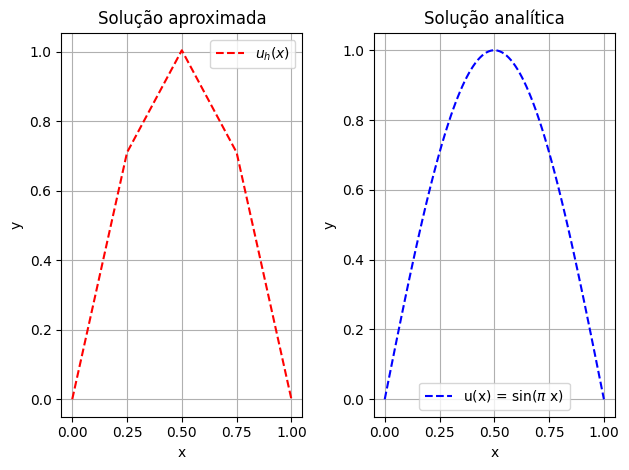

In [33]:
################################################################################
### ------------ Gráfico da solução --------------------------------------------
################################################################################

## numpy.linspace(start, stop, num), onde:
### start: Valor inicial da sequencia de pontos
### stop: Valor final da sequencia de pontos
### num: número não-negativo de amostras a serem geradas,
### ou seja, é o número de pontos no intervalo [start,stop]
### Logo, o número de subintervalos entre os pontos é de (num - 1) 
### e o tamanho de cada subintervalo entre os pontos é (stop - start)/(num - 1)

### Gera m pontos igualmente espaçados no intervalo (0,1)
### com tamanho 1/(m-1) para cada subintervalo
x1 = np.linspace(0, 1, m)  

### Gera 100 pontos igualmente espaçados no intervalo (0,1)
x2 = np.linspace(0, 1, 100)  


#  Armazeno a solucao aproximada c na variável y1:
y1 = c

#  Solucao analitica
y2 = np.sin(Pi*x2)

### Reservo a janela gráfica de tamanho 1 x 2 para exibir:
### Na parte esquerda (coluna 1 da janela), a solução aproximada,
### e na parte direita (coluna 2 da janela), a solução analítica.
fig, ax = plt.subplots(1, 2)

### Plotagem do gráfico da solução aproximada na parte esquerda da janela:
ax[0].plot(x1, y1, label='$u_h(x)$', color='red', linestyle='--')
### Plotagem do gráfico da solução analítica na parte direita da janela:
ax[1].plot(x2, y2, label='u(x) = sin($\\pi$ x)', color='blue', linestyle='--')

### Título para o gráfico da solução aproximada:
ax[0].set_title('Solução aproximada')
### Título para o gráfico da solução analítica:
ax[1].set_title('Solução analítica')


### Para o gráfico da solução aproximada:
### Legenda 'x' para o eixo x:
ax[0].set_xlabel('x')
### Legenda 'y' para o eixo y:
ax[0].set_ylabel('y')
### Exibe grades no gráfico:
ax[0].grid()
### Exibe legenda no gráfico:
ax[0].legend()

### Analogamente, para o gráfico da solução analítica:
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].grid()
ax[1].legend()

### A biblioteca Matplotlib fornece a função tight_layout(), 
### uma solução simples para ajustar automaticamente 
### os parâmetros de subtramas e garantir que os gráficos 
### estejam perfeitamente espaçados, sem sobreposição.
fig.tight_layout()

### Função da biblioteca Matplotlib que exibe a janela gráfica:
plt.show()

Gráficos da solução aproximada para:

- **nelx =** $2^3 = 8$, $h = \Delta x = 1/8 = 0.125$ 

$$
\begin{equation*}
\Vert ErrAbs\Vert_{L^2(\Omega)} = 0.0008304952316661898
\end{equation*}
$$

<center>
<img src="Figura010_nelx=8.png"/>
</center>


- **nelx =** $2^4 = 16$,  $h = \Delta x = 1/16 = 0.0625$

$$
\begin{equation*}
\Vert ErrAbs\Vert_{L^2(\Omega)} = 0.0002086597443827665
\end{equation*}
$$

<center>
<img src="Figura011_nelx=16.png"/>
</center>


- **nelx =** $2^8 = 256$,  $h = \Delta x = 1/256 = 0.00390625$

$$
\begin{equation*}
\Vert ErrAbs\Vert_{L^2(\Omega)} = 8.164086716607323e-07
\end{equation*}
$$

<center>
<img src="Figura015_nelx=256.png"/>
</center>


- **nelx =** $2^{10} = 1024$, $h = \Delta x = 1/1024 = 0.0009765625$

$$
\begin{equation*}
\Vert ErrAbs\Vert_{L^2(\Omega)} = 5.1040396398032594e-08
\end{equation*}
$$

<center>
<img src="Figura017_nelx=1024.png"/>
</center>
